# Problem Statement:
 The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not.

## Logistic Regression Model

In [1]:
#import necessary library
import pandas as pd
import numpy as np 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
#read data
data = pd.read_csv('titanic_train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.shape

(891, 12)

In [4]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
# observation
#1) junk column unnamed delete it
#2) i suspect there is problem in std of fare and max value
#3) age column has missing value
#4) deleting name , ticket , cabin column because it would help to predict label it a useless data
#5) encoding sex and embarked column 

In [6]:
# first removing all unncessary data

data = data.drop([ 'Name' , 'Ticket' , 'Cabin'] , axis=1)

In [7]:
#converting srting to number or using encoding technique to sex and embarked
from sklearn.preprocessing import LabelEncoder
lab_enc=LabelEncoder()

In [8]:
df1 = lab_enc.fit_transform(data['Sex']) #applying label encoder on categorical data

In [9]:
df2 = lab_enc.fit_transform(data['Embarked']) #applying label encoder on categorical data

In [10]:
data['Sex']=df1  #reassign to original dataset

In [11]:
data['Embarked']=df2  #reassign to original dataset

In [12]:
#see encodeing is applyed successfully
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2


In [13]:
data.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208,1.538721
std,257.353842,0.486592,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429,0.794231
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400,1.000000
50%,446.000000,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200,2.000000
75%,668.500000,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000,2.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,3.000000


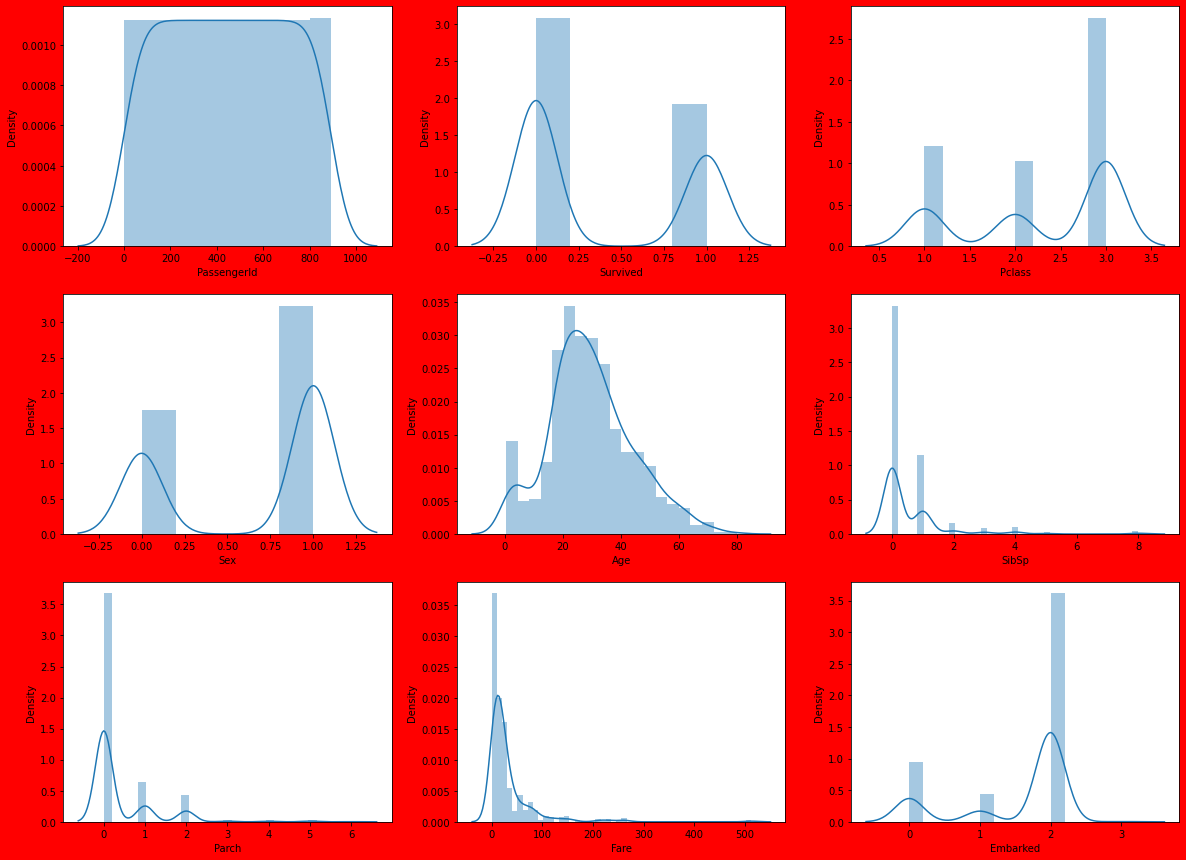

In [14]:
#lets see how data is distributed
plt.figure(figsize=(20,15) , facecolor='red')
plotnumber = 1

for column in data:
    if plotnumber <= 9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=10)
        
    plotnumber += 1
plt.show()

In [15]:
# we observe some outlier in fare and age and also missing value
# so first treating missing value using mean method
data['Age'].mean()

29.69911764705882

In [16]:
#rounding the age
np.ceil(data['Age'].mean())

30.0

In [17]:
data['Age'].fillna(30 , inplace=True)

In [18]:
#obseving the data aftr filling age column
data.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,29.758889,0.523008,0.381594,32.204208,1.538721
std,257.353842,0.486592,0.836071,0.477990,13.002570,1.102743,0.806057,49.693429,0.794231
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,1.000000
50%,446.000000,0.000000,3.000000,1.000000,30.000000,0.000000,0.000000,14.454200,2.000000
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,2.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,3.000000


In [19]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2


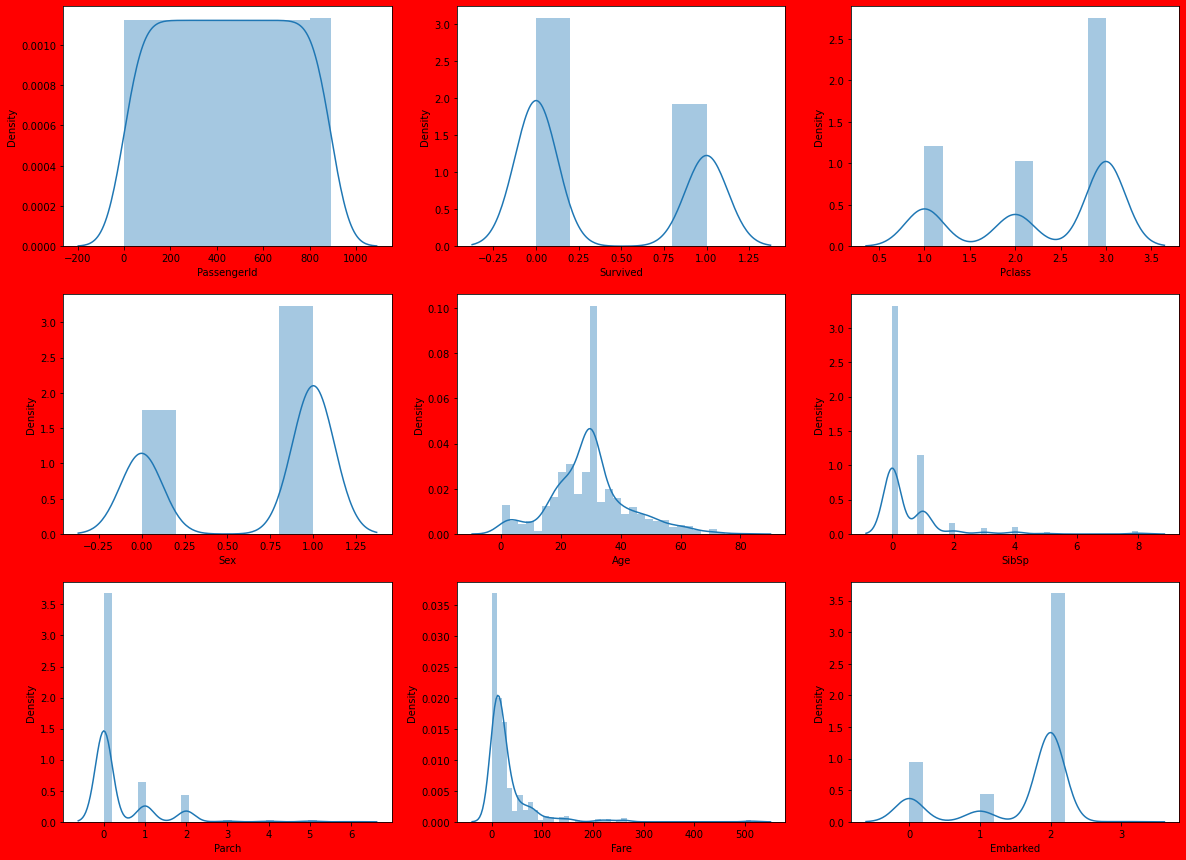

In [20]:
#lets see how data is distributed after filling null value in age
plt.figure(figsize=(20,15) , facecolor='red')
plotnumber = 1

for column in data:
    if plotnumber <= 9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=10)
        
    plotnumber += 1
plt.show() 

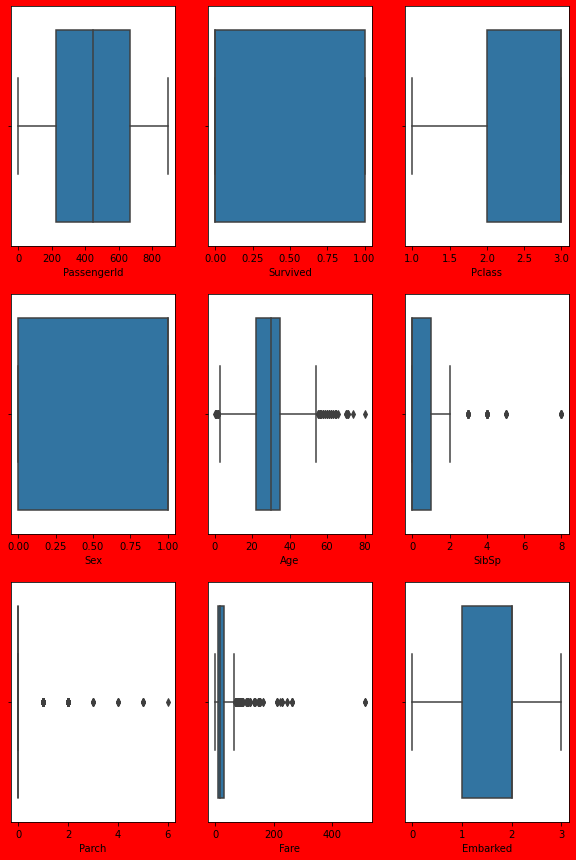

In [21]:
# lets see outlier
plt.figure(figsize=(10,15) , facecolor='red')
graph = 1

for column in data:
    if graph <= 9:
        plt.subplot(3,3,graph)
        ax=sns.boxplot(data[column])
        plt.xlabel(column,fontsize=10)
        
    graph += 1
plt.show()

In [22]:
# we observe outlier in age and fare so treat it 
# here im using iqr technique
q1=data.quantile(0.25)
q3=data.quantile(0.75)
iqr=q3-q1

In [23]:
#removing for fare coz its a skwed data
fare_high=(q3.Fare + (1.5*iqr.Fare))
fare_high

65.6344

In [24]:
outlier_high=np.where(data['Fare']>fare_high)
outlier_high

(array([  1,  27,  31,  34,  52,  61,  62,  72,  88, 102, 118, 120, 124,
        139, 151, 159, 180, 195, 201, 215, 218, 224, 230, 245, 256, 257,
        258, 262, 268, 269, 275, 290, 291, 297, 299, 305, 306, 307, 310,
        311, 318, 319, 324, 325, 332, 334, 336, 337, 341, 366, 369, 373,
        375, 377, 380, 385, 390, 393, 412, 435, 438, 445, 453, 484, 486,
        496, 498, 504, 505, 520, 527, 537, 540, 544, 550, 557, 558, 581,
        585, 587, 591, 609, 627, 641, 645, 655, 659, 660, 665, 679, 681,
        689, 698, 700, 708, 716, 730, 737, 741, 742, 745, 759, 763, 765,
        779, 789, 792, 802, 820, 829, 835, 846, 849, 856, 863, 879],
       dtype=int64),)

In [25]:
data=data.drop(data.index[outlier_high])
data.shape

(775, 9)

In [26]:
data.reset_index()

,index,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,1,0,3,1,22.0,1,0,7.2500,2
1,2,3,1,3,0,26.0,0,0,7.9250,2
2,3,4,1,1,0,35.0,1,0,53.1000,2
3,4,5,0,3,1,35.0,0,0,8.0500,2
4,5,6,0,3,1,30.0,0,0,8.4583,1
...,...,...,...,...,...,...,...,...,...,...
770,886,887,0,2,1,27.0,0,0,13.0000,2
771,887,888,1,1,0,19.0,0,0,30.0000,2
772,888,889,0,3,0,30.0,1,2,23.4500,2
773,889,890,1,1,1,26.0,0,0,30.0000,0


In [27]:
#removing for age coz its a skwed data
age_high=(q3.Age + (1.5*iqr.Age))
age_high

54.5

In [28]:
outlier_high=np.where(data['Age']>age_high)
outlier_high

(array([ 10,  14,  30,  49,  85,  87, 106, 137, 154, 158, 209, 228, 249,
        282, 393, 404, 420, 422, 427, 428, 471, 480, 493, 543, 544, 547,
        562, 583, 593, 602, 668, 738], dtype=int64),)

In [29]:
data=data.drop(data.index[outlier_high])
data.shape

(743, 9)

In [30]:
data.reset_index()

,index,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,1,0,3,1,22.0,1,0,7.2500,2
1,2,3,1,3,0,26.0,0,0,7.9250,2
2,3,4,1,1,0,35.0,1,0,53.1000,2
3,4,5,0,3,1,35.0,0,0,8.0500,2
4,5,6,0,3,1,30.0,0,0,8.4583,1
...,...,...,...,...,...,...,...,...,...,...
738,886,887,0,2,1,27.0,0,0,13.0000,2
739,887,888,1,1,0,19.0,0,0,30.0000,2
740,888,889,0,3,0,30.0,1,2,23.4500,2
741,889,890,1,1,1,26.0,0,0,30.0000,0


In [31]:
# for age low
age_low=(q1.Age - (1.5*iqr.Age))
age_low

2.5

In [32]:
outlier_low=np.where(data['Age']<age_low)
outlier_low

(array([  6,  13,  66, 101, 140, 147, 156, 176, 278, 312, 316, 390, 400,
        439, 532, 534, 624, 652, 664, 684, 687, 690], dtype=int64),)

In [33]:
data=data.drop(data.index[outlier_low])
data.shape

(721, 9)

In [34]:
data.reset_index()

,index,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,1,0,3,1,22.0,1,0,7.2500,2
1,2,3,1,3,0,26.0,0,0,7.9250,2
2,3,4,1,1,0,35.0,1,0,53.1000,2
3,4,5,0,3,1,35.0,0,0,8.0500,2
4,5,6,0,3,1,30.0,0,0,8.4583,1
...,...,...,...,...,...,...,...,...,...,...
716,886,887,0,2,1,27.0,0,0,13.0000,2
717,887,888,1,1,0,19.0,0,0,30.0000,2
718,888,889,0,3,0,30.0,1,2,23.4500,2
719,889,890,1,1,1,26.0,0,0,30.0000,0


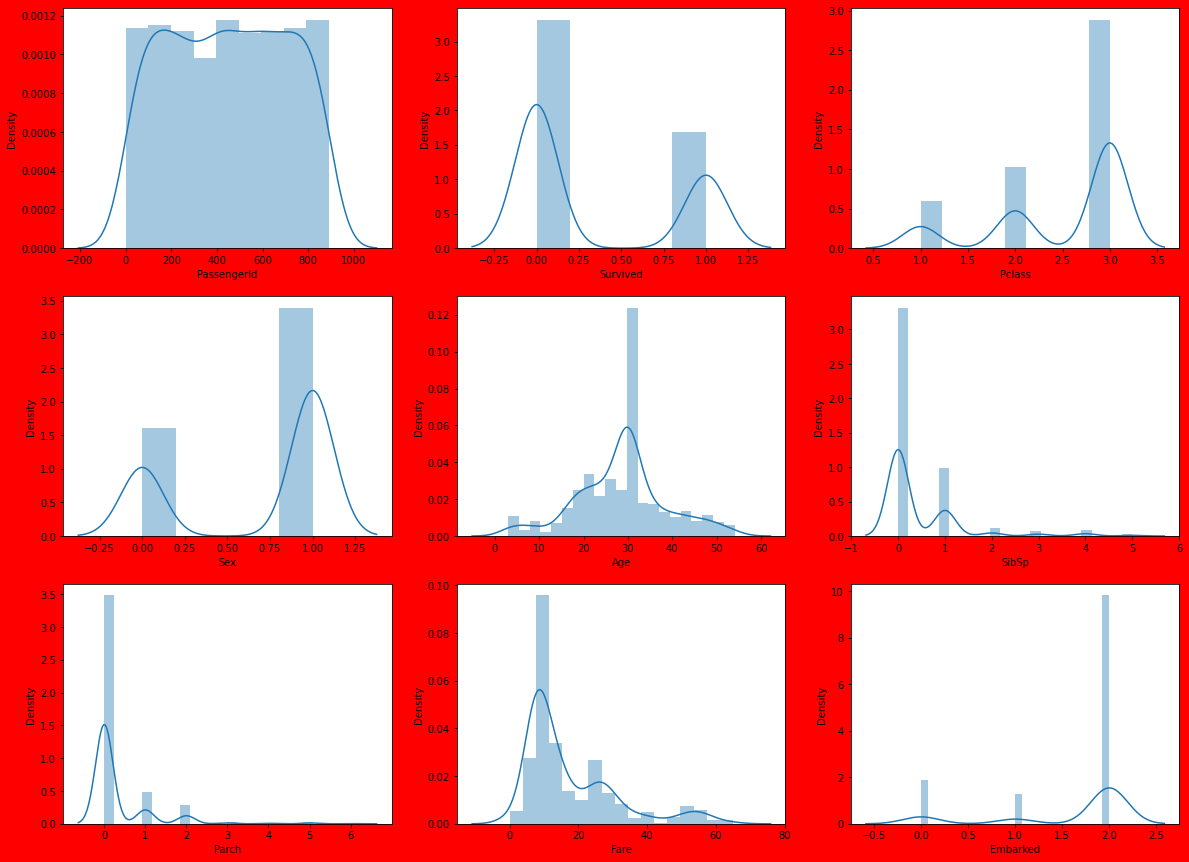

In [35]:
#lets see how data is distributed after filling null value in age and removing outliers
plt.figure(figsize=(20,15) , facecolor='red')
plotnumber = 1

for column in data:
    if plotnumber <= 9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=10)
        
    plotnumber += 1
plt.show() 

In [36]:
#seperating feature and label
X = data.drop(['Survived'] , axis=1)
y = data['Survived']

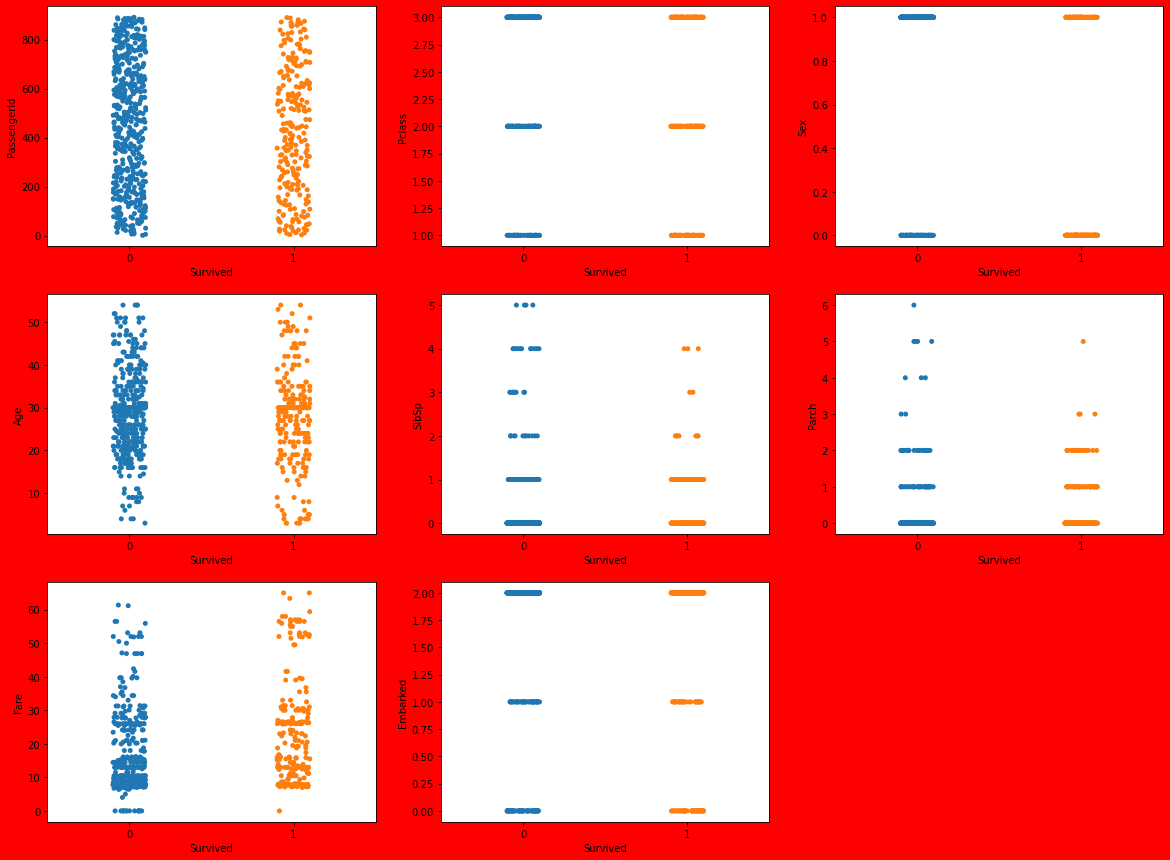

In [37]:
# checking relationship of feature and label
plt.figure(figsize=(20,15) , facecolor='red')
plotnumber=1

for column in X:
    if plotnumber <= 9:
        ax=plt.subplot(3,3,plotnumber)
        sns.stripplot(y,X[column])
        
    plotnumber += 1
plt.show()

In [38]:
# after seeing all the graph as per me all are contrubuting to label so keepling all features

In [39]:
# scale the dataset
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X_scaler=scaler.fit_transform(X)

In [40]:
# splitting data into train test split
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X_scaler,y,test_size=0.25,random_state=355)

In [41]:
## IMPORT LOGISTIC REGRESSION ##
from sklearn.linear_model import LogisticRegression

In [42]:
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

LogisticRegression()

In [43]:
# training for traing data
log_reg.predict(X_train)

array([0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,

In [44]:
#training Score
log_reg.score(X_train,y_train)

0.8055555555555556

In [45]:
#training for test dataset
y_pred=log_reg.predict(X_test)

In [46]:
#testing Score
log_reg.score(X_test,y_test)

0.7569060773480663

In [47]:
# Training Score is 80.55555555555556%
# Testing Score is 75.69060773480663%

In [48]:
# reports
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [49]:
#accuracy 
Accuracy=accuracy_score(y_test,y_pred)
Accuracy

0.7569060773480663

In [50]:
#confusion matrix
Confusion_matrix=confusion_matrix(y_test,y_pred)
Confusion_matrix

array([[109,  23],
       [ 21,  28]], dtype=int64)

In [51]:
print('\n\n Classification Report\n' , classification_report(y_test,y_pred,digits=2))



 Classification Report
               precision    recall  f1-score   support

           0       0.84      0.83      0.83       132
           1       0.55      0.57      0.56        49

    accuracy                           0.76       181
   macro avg       0.69      0.70      0.70       181
weighted avg       0.76      0.76      0.76       181



## hyperparameter tuning for logistic regression

In [52]:
# Hyperparameter tuning#
from sklearn.model_selection import GridSearchCV

In [53]:
param_grid={'penalty':['none' , 'elasticnet' , 'l1' , 'l2'],
           'C':[0.001,0.01,1,10,100]}

In [54]:
gridsearch=GridSearchCV(estimator=log_reg,param_grid=param_grid)

In [55]:
gridsearch.fit(X_train,y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 1, 10, 100],
                         'penalty': ['none', 'elasticnet', 'l1', 'l2']})

In [56]:
#see best para
gridsearch.best_params_

{'C': 0.001, 'penalty': 'none'}

In [57]:
Log_reg=LogisticRegression(C=0.001,penalty='none')

In [58]:
Log_reg.fit(X_train,y_train)

LogisticRegression(C=0.001, penalty='none')

In [59]:
y_pred=Log_reg.predict(X_test)

In [60]:
Log_reg.score(X_test,y_test)

0.7569060773480663

In [61]:
# both are giving same result

In [62]:
# Testing Score after hyperparameter tuning is 75.69060773480663%

# Random Forest Classifier Model

In [63]:
#import necessary library

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier #RandomForestRegressor if regression problem
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [64]:
#read data
data = pd.read_csv('titanic_train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [65]:
data.shape

(891, 12)

In [66]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [67]:
# observation
#1) junk column unnamed delete it
#2) i suspect there is problem in std of fare and max value
#3) age column has missing value
#4) deleting name , ticket , cabin column because it would help to predict label it a useless data
#5) encoding sex and embarked column 

In [68]:
# first removing all unncessary data

data = data.drop([ 'Name' , 'Ticket' , 'Cabin'] , axis=1)

In [69]:
#converting srting to number or using encoding technique to sex and embarked
from sklearn.preprocessing import LabelEncoder
lab_enc=LabelEncoder()

In [70]:
df1 = lab_enc.fit_transform(data['Sex']) #applying label encoder on categorical data

In [71]:
df2 = lab_enc.fit_transform(data['Embarked']) #applying label encoder on categorical data

In [72]:
data['Sex']=df1  #reassign to original dataset

In [73]:
data['Embarked']=df2  #reassign to original dataset

In [74]:
#see encodeing is applyed successfully
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2


In [75]:
# we observe some outlier in fare and age and also missing value
# so first treating missing value using mean method
data['Age'].mean()
np.ceil(data['Age'].mean())


30.0

In [76]:
data['Age'].fillna(30 , inplace=True)

In [77]:
data.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,29.758889,0.523008,0.381594,32.204208,1.538721
std,257.353842,0.486592,0.836071,0.477990,13.002570,1.102743,0.806057,49.693429,0.794231
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,1.000000
50%,446.000000,0.000000,3.000000,1.000000,30.000000,0.000000,0.000000,14.454200,2.000000
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,2.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,3.000000


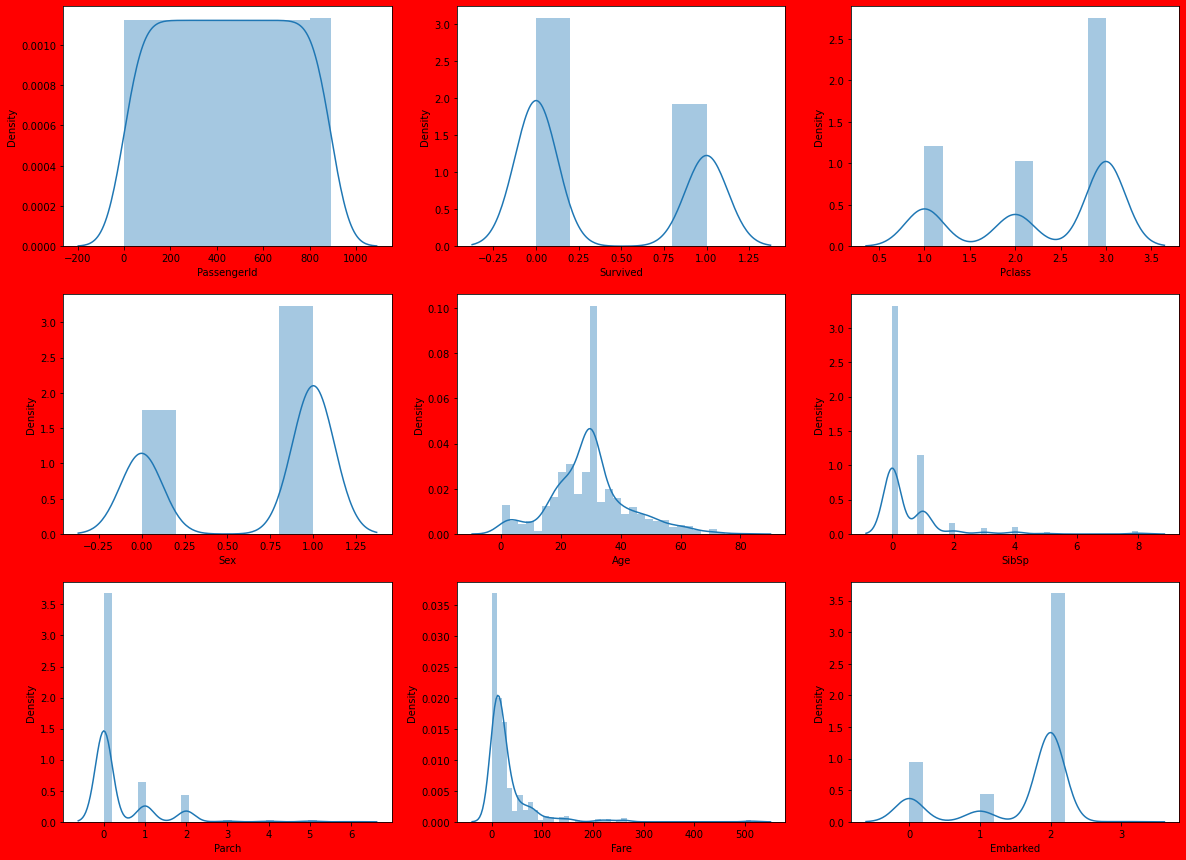

In [78]:
#lets see how data is distributed after filling null value in age
plt.figure(figsize=(20,15) , facecolor='red')
plotnumber = 1

for column in data:
    if plotnumber <= 9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=10)
        
    plotnumber += 1
plt.show() 

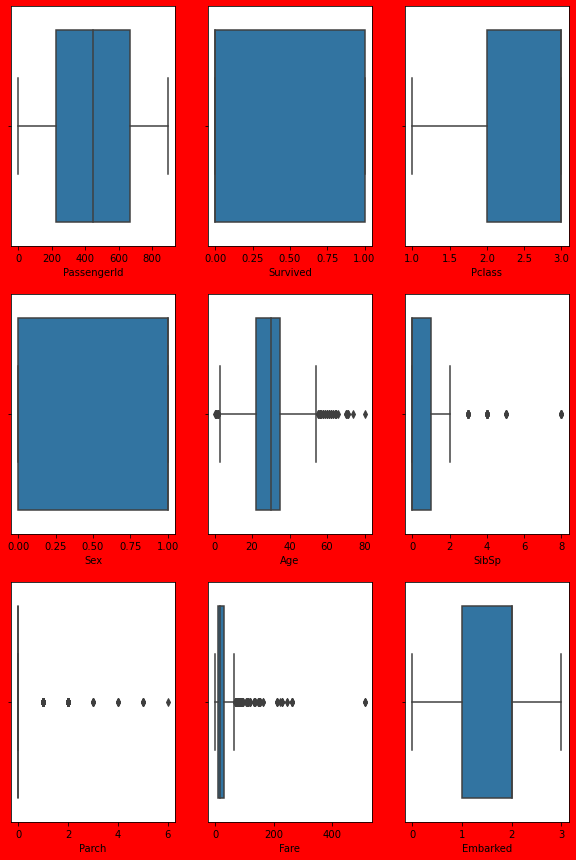

In [79]:
# lets see outlier
plt.figure(figsize=(10,15) , facecolor='red')
graph = 1

for column in data:
    if graph <= 9:
        plt.subplot(3,3,graph)
        ax=sns.boxplot(data[column])
        plt.xlabel(column,fontsize=10)
        
    graph += 1
plt.show()

In [80]:
# in this we will remove outliers by using zscore
# we will go with 3 std
# from scipy import stats

from scipy.stats import zscore

In [81]:
# new code for deleting outlier here we take std = 3
z_score = zscore(data[['Age','SibSp','Parch','Fare',]])
abs_z_score = np.abs(z_score)

filtering_entry = (abs_z_score < 3 ).all(axis=1)

data = data[filtering_entry]

data.describe()


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000
mean,445.719512,0.390244,2.310976,0.657317,29.854476,0.348780,0.254878,25.836051,1.542683
std,255.213085,0.488103,0.826678,0.474896,12.151549,0.619434,0.565308,29.817529,0.791828
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,226.750000,0.000000,2.000000,0.000000,23.000000,0.000000,0.000000,7.895800,1.000000
50%,446.500000,0.000000,3.000000,1.000000,30.000000,0.000000,0.000000,13.000000,2.000000
75%,661.250000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,27.000000,2.000000
max,891.000000,1.000000,3.000000,1.000000,66.000000,3.000000,2.000000,164.866700,3.000000


In [82]:
#checking that zscore is applied properly
data.shape

(820, 9)

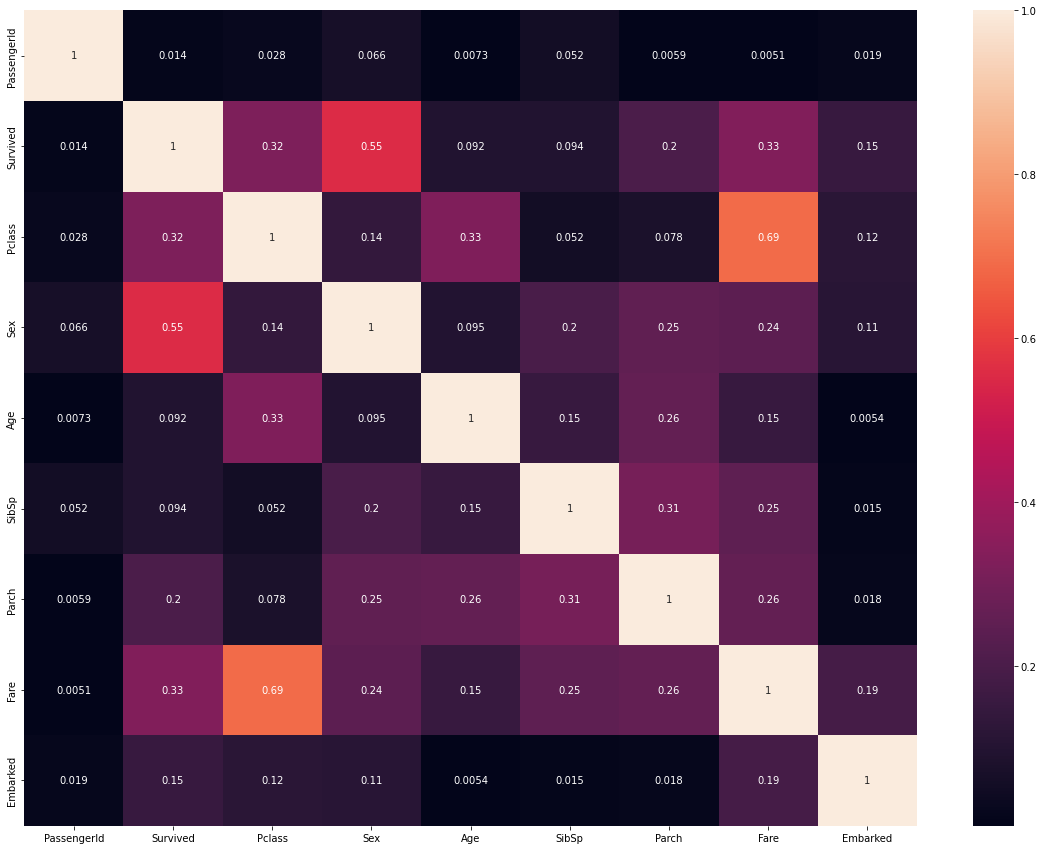

In [83]:
# check for multicollinarity problem exist or not using heat map

df_corr = data.corr().abs()
plt.figure(figsize=(20,15))
sns.heatmap (df_corr , annot = True , annot_kws = {'size':10}
            )
plt.show()

In [84]:
#1)  now in heatmap here we see all relationship featue vs feature and feature vs label
#2) darker is less reationship and lighter is higher relation ship
#3) for multicollinerity we have to take higher relationship ,,  
#4)for example i assume more than 75% relationship then there is multicollinear can be exist im basically suspecting 
#5) after seeing all the data there is no such multicollinear problem exist so going forward

In [85]:
#seperating feature and label
X = data.drop(['Survived'] , axis=1)
y = data['Survived']

In [86]:
#Finding the Best Random State
MaxAccu=0
MaxRS=0

for i in range (1,100):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=i)
    rf = RandomForestClassifier()
    rf.fit(X_train,y_train)
    
    y_pred=rf.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    print ('Testing Accuracy' , accuracy , 'RandomState' ,i)
    print('\n')
    
    
    if accuracy>MaxAccu:
        MaxAccu=accuracy
        MaxRS=i
        print('MAXINING TESTING SCORE' , MaxAccu , 'ON RANDOM STATE OF' , i)

Testing Accuracy 0.7902439024390244 RandomState 1


MAXINING TESTING SCORE 0.7902439024390244 ON RANDOM STATE OF 1
Testing Accuracy 0.7902439024390244 RandomState 2


Testing Accuracy 0.8439024390243902 RandomState 3


MAXINING TESTING SCORE 0.8439024390243902 ON RANDOM STATE OF 3
Testing Accuracy 0.8390243902439024 RandomState 4


Testing Accuracy 0.7902439024390244 RandomState 5


Testing Accuracy 0.7804878048780488 RandomState 6


Testing Accuracy 0.8097560975609757 RandomState 7


Testing Accuracy 0.7707317073170732 RandomState 8


Testing Accuracy 0.848780487804878 RandomState 9


MAXINING TESTING SCORE 0.848780487804878 ON RANDOM STATE OF 9
Testing Accuracy 0.8146341463414634 RandomState 10


Testing Accuracy 0.824390243902439 RandomState 11


Testing Accuracy 0.7853658536585366 RandomState 12


Testing Accuracy 0.8390243902439024 RandomState 13


Testing Accuracy 0.848780487804878 RandomState 14


Testing Accuracy 0.8146341463414634 RandomState 15


Testing Accuracy 0.8048780487

In [87]:
print('Best Accuracy is ' , MaxAccu , 'On Random State' , MaxRS)

Best Accuracy is  0.8585365853658536 On Random State 47


In [88]:
# train test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=47)

In [89]:
#write one function and call as many time as you want
def metric_score (clf,X_train,X_test,y_train,y_test,train=True):
    if train:
        y_pred = clf.predict(X_train)
        print ('====Training Score====')
        print (f"Accuracy score : {accuracy_score(y_train,y_pred)*100:2f}%")
        
    elif train==False:
        pred = clf.predict(X_test)
        print ('====Testing Score====')
        print (f"Accuracy score : {accuracy_score(y_test,pred)*100:2f}%")
        
        print ('\n \n Classification report \n ' , classification_report(y_test,pred,digits=2))

In [90]:
# model initilization
clf_rf = RandomForestClassifier()
clf_rf.fit(X_train,y_train)


RandomForestClassifier()

In [91]:
# call the function
metric_score (clf_rf,X_train,X_test,y_train,y_test,train = True)
metric_score (clf_rf,X_train,X_test,y_train,y_test,train=False)

====Training Score====
Accuracy score : 100.000000%
====Testing Score====
Accuracy score : 84.878049%

 
 Classification report 
                precision    recall  f1-score   support

           0       0.89      0.85      0.87       124
           1       0.79      0.84      0.81        81

    accuracy                           0.85       205
   macro avg       0.84      0.85      0.84       205
weighted avg       0.85      0.85      0.85       205



In [92]:
# Training Score is 100.000000%
# Testing Score is 84.878049%

## hyperparameter tuning for random forest

In [93]:
# we are tuning 4 important hyperparameter rightnow we are passing the different value for both parameter
params_grid = {'n_estimators' : range(1,5),
               'criterion' : ['entropy' , 'gini'],
               'max_depth' : range(1,30),
               'min_samples_split' :range(5,10),
               'min_samples_leaf':range(1,10)}

In [94]:
# here we are define some parameter and ask gridsearchcv which one is best
grd = GridSearchCV(clf_rf,param_grid = params_grid)


In [95]:
#pass dataset to train 
grd.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(1, 30),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(5, 10),
                         'n_estimators': range(1, 5)})

In [96]:
print ('Best parameters : ' , grd.best_params_) #printing best parameters

Best parameters :  {'criterion': 'gini', 'max_depth': 21, 'min_samples_leaf': 4, 'min_samples_split': 9, 'n_estimators': 4}


In [145]:
#initiate what new parameter we got
rf=RandomForestClassifier(criterion= 'entropy', max_depth = 15, min_samples_leaf= 2, min_samples_split= 5,n_estimators= 20)
rf.fit(X_train,y_train)

#i tried different combination and i find this is best parameter so using this instead of gridsearch parameters

RandomForestClassifier(criterion='entropy', max_depth=15, min_samples_leaf=2,
                       min_samples_split=5, n_estimators=20)

In [146]:
# call the function
metric_score (rf,X_train,X_test,y_train,y_test,train = True)
metric_score (rf,X_train,X_test,y_train,y_test,train=False)

====Training Score====
Accuracy score : 90.569106%
====Testing Score====
Accuracy score : 85.365854%

 
 Classification report 
                precision    recall  f1-score   support

           0       0.89      0.87      0.88       124
           1       0.81      0.83      0.82        81

    accuracy                           0.85       205
   macro avg       0.85      0.85      0.85       205
weighted avg       0.85      0.85      0.85       205



In [147]:
# Training Score for Random Forest after hyperparameter is 90.569106%
# Testing Score for Random Forest after hyperparameter is 85.365854%

# Decision Tree Classifier Model

In [100]:
#import necessary librarys
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier #if regression then regressor
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score,classification_report
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


In [101]:
#read data
data = pd.read_csv('titanic_train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [102]:
data.shape

(891, 12)

In [103]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [104]:
# observation
#1) junk column unnamed delete it
#2) i suspect there is problem in std of fare and max value
#3) age column has missing value
#4) deleting name , ticket , cabin column because it would help to predict label it a useless data
#5) encoding sex and embarked column 

In [105]:
# first removing all unncessary data

data = data.drop([ 'Name' , 'Ticket' , 'Cabin'] , axis=1)

In [106]:
#converting srting to number or using encoding technique to sex and embarked
from sklearn.preprocessing import LabelEncoder
lab_enc=LabelEncoder()

In [107]:
df1 = lab_enc.fit_transform(data['Sex']) #applying label encoder on categorical data

In [108]:
df2 = lab_enc.fit_transform(data['Embarked']) #applying label encoder on categorical data

In [109]:
data['Sex']=df1  #reassign to original dataset

In [110]:
data['Embarked']=df2  #reassign to original dataset

In [111]:
#see encodeing is applyed successfully
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2


In [112]:
# we observe some outlier in fare and age and also missing value
# so first treating missing value using mean method
data['Age'].mean()
np.ceil(data['Age'].mean())


30.0

In [113]:
data['Age'].fillna(30 , inplace=True)

In [114]:
data.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,29.758889,0.523008,0.381594,32.204208,1.538721
std,257.353842,0.486592,0.836071,0.477990,13.002570,1.102743,0.806057,49.693429,0.794231
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,1.000000
50%,446.000000,0.000000,3.000000,1.000000,30.000000,0.000000,0.000000,14.454200,2.000000
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,2.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,3.000000


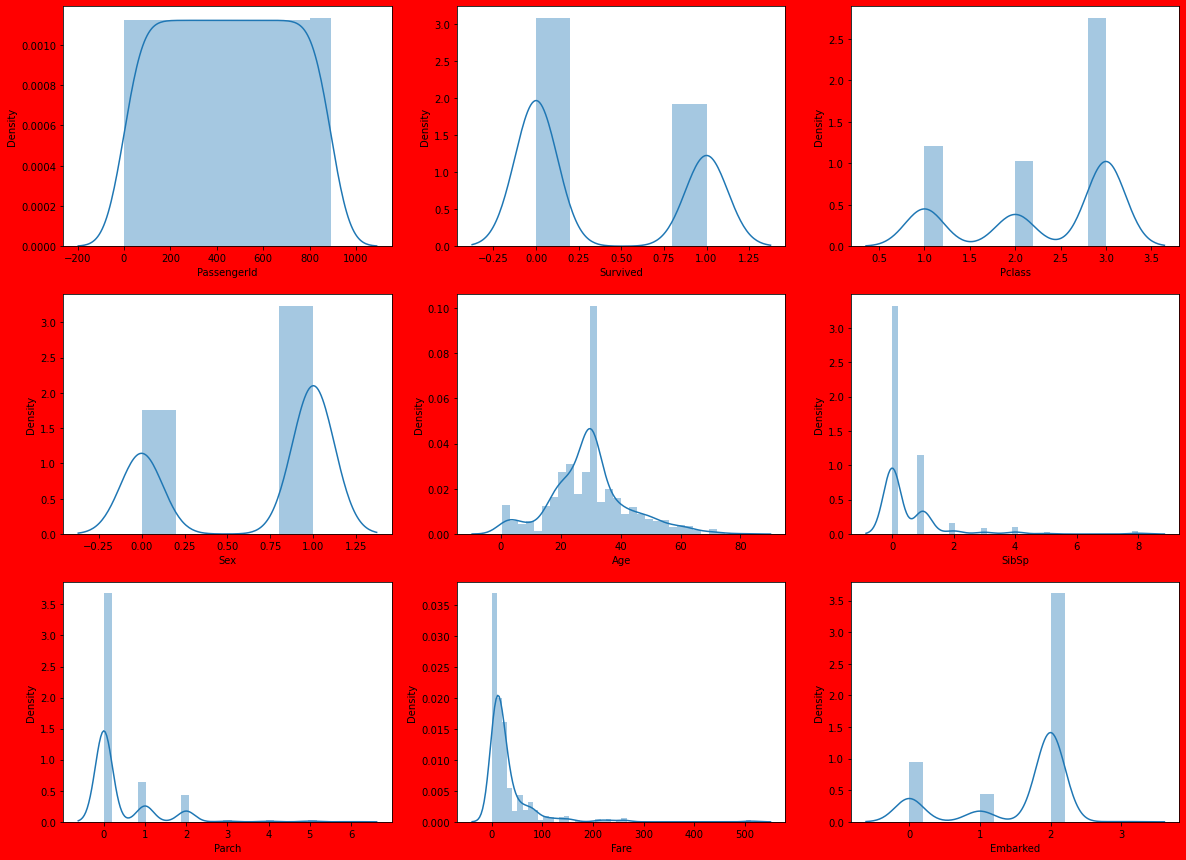

In [115]:
#lets see how data is distributed after filling null value in age
plt.figure(figsize=(20,15) , facecolor='red')
plotnumber = 1

for column in data:
    if plotnumber <= 9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=10)
        
    plotnumber += 1
plt.show() 

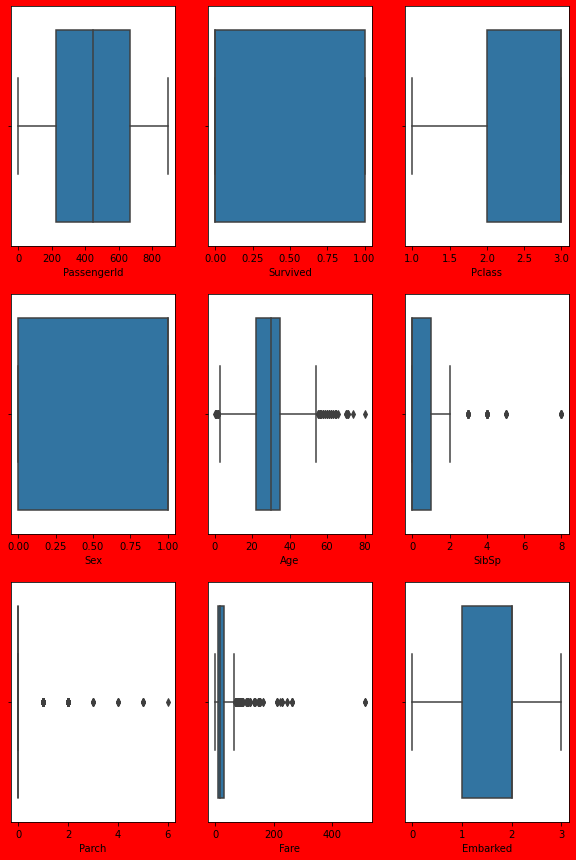

In [116]:
# lets see outlier
plt.figure(figsize=(10,15) , facecolor='red')
graph = 1

for column in data:
    if graph <= 9:
        plt.subplot(3,3,graph)
        ax=sns.boxplot(data[column])
        plt.xlabel(column,fontsize=10)
        
    graph += 1
plt.show()

In [117]:
# in this we will remove outliers by using zscore
# we will go with 3 std
# from scipy import stats

from scipy.stats import zscore

In [118]:
# new code for deleting outlier here we take std = 3
z_score = zscore(data[['Age','SibSp','Parch','Fare',]])
abs_z_score = np.abs(z_score)

filtering_entry = (abs_z_score < 3 ).all(axis=1)

data = data[filtering_entry]

data.describe()


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000
mean,445.719512,0.390244,2.310976,0.657317,29.854476,0.348780,0.254878,25.836051,1.542683
std,255.213085,0.488103,0.826678,0.474896,12.151549,0.619434,0.565308,29.817529,0.791828
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,226.750000,0.000000,2.000000,0.000000,23.000000,0.000000,0.000000,7.895800,1.000000
50%,446.500000,0.000000,3.000000,1.000000,30.000000,0.000000,0.000000,13.000000,2.000000
75%,661.250000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,27.000000,2.000000
max,891.000000,1.000000,3.000000,1.000000,66.000000,3.000000,2.000000,164.866700,3.000000


In [119]:
data.shape

(820, 9)

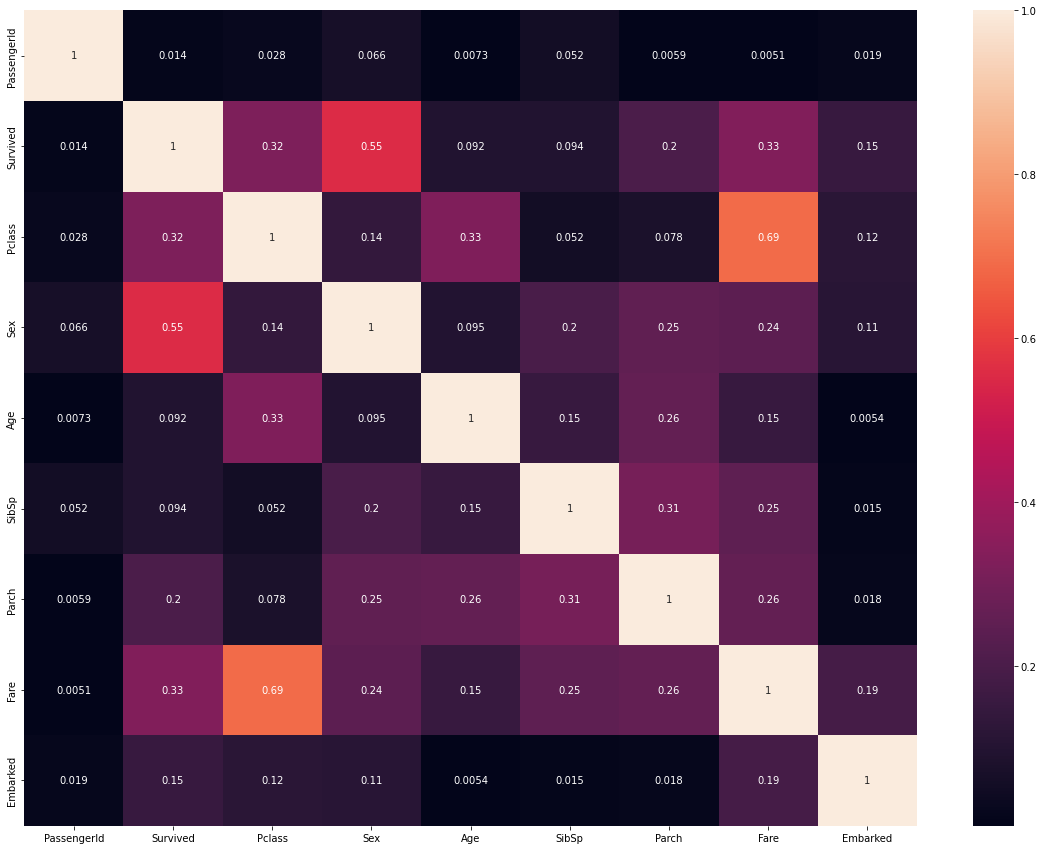

In [120]:
# check for multicollinarity problem exist or not using heat map

df_corr = data.corr().abs()
plt.figure(figsize=(20,15))
sns.heatmap (df_corr , annot = True , annot_kws = {'size':10}
            )
plt.show()

In [121]:
#1)  now in heatmap here we see all relationship featue vs feature and feature vs label
#2) darker is less reationship and lighter is higher relation ship
#3) for multicollinerity we have to take higher relationship ,,  
#4)for example i assume more than 75% relationship then there is multicollinear can be exist im basically suspecting 
#5) after seeing all the data there is no such multicollinear problem exist so going forward

In [122]:
#seperating feature and label
X = data.drop(['Survived'] , axis=1)
y = data['Survived']

In [123]:
#Finding the Best Random State
MaxAccu=0
MaxRS=0

for i in range (1,100):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=i)
    dt=DecisionTreeClassifier()
    dt.fit(X_train,y_train)
    
    y_pred=dt.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    print ('Testing Accuracy' , accuracy , 'RandomState' ,i)
    print('\n')
    
    
    if accuracy>MaxAccu:
        MaxAccu=accuracy
        MaxRS=i
        print('MAXINING TESTING SCORE' , MaxAccu , 'ON RANDOM STATE OF' , i)

Testing Accuracy 0.7365853658536585 RandomState 1


MAXINING TESTING SCORE 0.7365853658536585 ON RANDOM STATE OF 1
Testing Accuracy 0.7024390243902439 RandomState 2


Testing Accuracy 0.7707317073170732 RandomState 3


MAXINING TESTING SCORE 0.7707317073170732 ON RANDOM STATE OF 3
Testing Accuracy 0.7073170731707317 RandomState 4


Testing Accuracy 0.7317073170731707 RandomState 5


Testing Accuracy 0.7170731707317073 RandomState 6


Testing Accuracy 0.7853658536585366 RandomState 7


MAXINING TESTING SCORE 0.7853658536585366 ON RANDOM STATE OF 7
Testing Accuracy 0.7170731707317073 RandomState 8


Testing Accuracy 0.848780487804878 RandomState 9


MAXINING TESTING SCORE 0.848780487804878 ON RANDOM STATE OF 9
Testing Accuracy 0.697560975609756 RandomState 10


Testing Accuracy 0.775609756097561 RandomState 11


Testing Accuracy 0.7268292682926829 RandomState 12


Testing Accuracy 0.7658536585365854 RandomState 13


Testing Accuracy 0.7463414634146341 RandomState 14


Testing Accuracy 0.

In [124]:
print('Best Accuracy is ' , MaxAccu , 'On Random State' , MaxRS)

Best Accuracy is  0.848780487804878 On Random State 9


In [125]:
# train test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=9)

In [126]:
#write one function and call as many time as you want
def metric_score (clf,X_train,X_test,y_train,y_test,train=True):
    if train:
        y_pred = clf.predict(X_train)
        print ('====Training Score====')
        print (f"Accuracy score : {accuracy_score(y_train,y_pred)*100:2f}%")
        
    elif train==False:
        pred = clf.predict(X_test)
        print ('====Testing Score====')
        print (f"Accuracy score : {accuracy_score(y_test,pred)*100:2f}%")
        
        print ('\n \n Classification report \n ' , classification_report(y_test,pred,digits=2))

In [127]:
# model initilization
clf_dt = DecisionTreeClassifier()
clf_dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [128]:
# call the function
metric_score (clf_dt,X_train,X_test,y_train,y_test,train = True)
metric_score (clf_dt,X_train,X_test,y_train,y_test,train=False)

====Training Score====
Accuracy score : 100.000000%
====Testing Score====
Accuracy score : 83.414634%

 
 Classification report 
                precision    recall  f1-score   support

           0       0.87      0.85      0.86       124
           1       0.78      0.80      0.79        81

    accuracy                           0.83       205
   macro avg       0.83      0.83      0.83       205
weighted avg       0.83      0.83      0.83       205



In [129]:
# Training Score is 100.000000%
# Testing Score is 83.414634%

## hyperparameter tuning for decision tree

In [130]:
# we are tuning 4 important hyperparameter rightnow we are passing the different value for both parameter
grid_param = {
                'criterion':['gini','entropy'],
                'max_depth':range(1,30),
                'min_samples_leaf':range(1,5),
                'min_samples_split':range(5,10),
                'max_leaf_nodes':range(1,10)
}

In [131]:
# here we are define some parameter and ask gridsearchcv which one is best
grid_search = GridSearchCV (estimator = clf_dt,param_grid=grid_param,cv=5,n_jobs=-1)

In [132]:
#pass dataset to train 
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 30),
                         'max_leaf_nodes': range(1, 10),
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(5, 10)})

In [133]:
# see best parameters
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'entropy', 'max_depth': 4, 'max_leaf_nodes': 9, 'min_samples_leaf': 3, 'min_samples_split': 5}


In [134]:
#initiate what new parameter we got

clf_dt=DecisionTreeClassifier(criterion= 'gini', max_depth = 30, min_samples_leaf= 2, min_samples_split= 3)
clf_dt.fit(X_train,y_train)

#i tried different combination and i find this is best parameter so using this instead of gridsearch parameters

DecisionTreeClassifier(max_depth=30, min_samples_leaf=2, min_samples_split=3)

In [135]:
# call the function
metric_score (clf_dt,X_train,X_test,y_train,y_test,train = True)
metric_score (clf_dt,X_train,X_test,y_train,y_test,train=False)

====Training Score====
Accuracy score : 93.983740%
====Testing Score====
Accuracy score : 81.951220%

 
 Classification report 
                precision    recall  f1-score   support

           0       0.84      0.86      0.85       124
           1       0.78      0.75      0.77        81

    accuracy                           0.82       205
   macro avg       0.81      0.81      0.81       205
weighted avg       0.82      0.82      0.82       205



In [136]:
# Training Score after Hyperparameter Tuning is 93.983740%
# Testing Score after Hyperparameter Tuning is 81.951220%

In [137]:
### Logistic Regression
# Training Score is 80.55555555555556%
# Testing Score is 75.69060773480663%

# after hyperparameter
# Testing Score after hyperparameter tuning is 75.69060773480663%

In [138]:
## Random Forest Classifier
# Training Score is 100.000000%
# Testing Score is 84.878049%

# after hyperparameter tuning
# Training Score for Random Forest after hyperparameter is 90.569106%
# Testing Score for Random Forest after hyperparameter is 85.365854%

In [139]:
## Decision Tree Classifier
# Training Score is 100.000000%
# Testing Score is 83.414634%

# after hyperparameter tuning
# Training Score after Hyperparameter Tuning is 93.983740%
# Testing Score after Hyperparameter Tuning is 81.951220%


In [140]:
## after seeing all results i have conclude that Random Forest is best model for perticular model because its training and testing with and out without hyperparameter it give best result as compare to logistic and decision tree classifier